In [75]:
try:
  from sklearnex import patch_sklearn # speed up sklearn if cpu is intel
  patch_sklearn()
except ImportError as sklearnex_not_installed:
  print("sklearnex not installed, use default sklearn instead")
  print("if you want to use sklearn, please refer to https://pypi.org/project/scikit-learn-intelex/")
  

from TrainingData import load_KTH
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm, preprocessing
from sklearn.pipeline import make_pipeline
import pandas as pd

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [76]:
training_data = load_KTH()
training_data = training_data.apply(lambda row: row[training_data['label'].isin(['walking','running'])])

In [77]:
# training_data = load_KTH()
# training_data["label"] = training_data["label"].apply(lambda x: "running" if x=="jogging" else x)
# training_data.groupby("label").count()


<img src="images/Pose Landmark Model.png"><img>

from https://github.com/google/mediapipe/blob/master/docs/solutions/pose.md

In [78]:
unneeded_data = ["filename", "label",'NOSE_x', 'NOSE_y', 'LEFT_EYE_INNER_x', 'LEFT_EYE_INNER_y',
       'LEFT_EYE_x', 'LEFT_EYE_y', 'LEFT_EYE_OUTER_x', 'LEFT_EYE_OUTER_y',
       'RIGHT_EYE_INNER_x', 'RIGHT_EYE_INNER_y', 'RIGHT_EYE_x', 'RIGHT_EYE_y',
       'RIGHT_EYE_OUTER_x', 'RIGHT_EYE_OUTER_y', 'LEFT_EAR_x', 'LEFT_EAR_y',
       'RIGHT_EAR_x', 'RIGHT_EAR_y', 'MOUTH_LEFT_x', 'MOUTH_LEFT_y',
       'MOUTH_RIGHT_x', 'MOUTH_RIGHT_y','LEFT_PINKY_x', 'LEFT_PINKY_y',
       'RIGHT_PINKY_x', 'RIGHT_PINKY_y', 'LEFT_INDEX_x', 'LEFT_INDEX_y',
       'RIGHT_INDEX_x', 'RIGHT_INDEX_y', 'LEFT_THUMB_x', 'LEFT_THUMB_y',
       'RIGHT_THUMB_x', 'RIGHT_THUMB_y','LEFT_HEEL_x', 'LEFT_HEEL_y',
       'RIGHT_HEEL_x', 'RIGHT_HEEL_y', 'LEFT_FOOT_INDEX_x',
       'LEFT_FOOT_INDEX_y', 'RIGHT_FOOT_INDEX_x', 'RIGHT_FOOT_INDEX_y',]

In [79]:
le = preprocessing.LabelEncoder()
training_data["Encoded_label"] = le.fit_transform(training_data["label"])
training_data.drop(unneeded_data, axis=1, inplace=True)
training_data.head()

,LEFT_SHOULDER_x,LEFT_SHOULDER_y,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,LEFT_ELBOW_x,LEFT_ELBOW_y,RIGHT_ELBOW_x,RIGHT_ELBOW_y,LEFT_WRIST_x,LEFT_WRIST_y,...,RIGHT_HIP_y,LEFT_KNEE_x,LEFT_KNEE_y,RIGHT_KNEE_x,RIGHT_KNEE_y,LEFT_ANKLE_x,LEFT_ANKLE_y,RIGHT_ANKLE_x,RIGHT_ANKLE_y,Encoded_label
0,0.900717,0.137010,0.812234,0.144727,0.777064,0.300874,0.755782,0.290874,0.644433,0.293516,...,0.488356,0.683099,0.549518,0.505097,0.681187,0.622896,0.738807,0.355810,0.948677,0
1,0.599000,0.140287,0.532054,0.140587,0.763081,0.303423,0.549853,0.310965,0.535900,0.331990,...,0.491362,0.325563,0.691165,0.753709,0.686718,0.234023,0.946797,0.945526,0.758021,0
2,0.492056,0.142136,0.427167,0.134636,0.708207,0.321111,0.506468,0.312526,0.403071,0.350399,...,0.489294,0.218949,0.704855,0.690588,0.697133,0.226308,0.948751,0.961872,0.739383,0
3,0.302859,0.153922,0.257023,0.141345,0.481572,0.350691,0.354167,0.322818,0.129033,0.373827,...,0.508129,0.379546,0.736556,0.128489,0.730233,0.868411,0.806285,0.230590,0.949500,0
4,0.360114,0.157081,0.347016,0.145569,0.386547,0.340360,0.439695,0.341934,0.083003,0.338915,...,0.485797,0.265033,0.726621,0.300380,0.704613,0.537228,0.936596,0.856375,0.759402,0


In [80]:
le.classes_

array(['running', 'walking'], dtype=object)

In [81]:
le.transform(le.classes_)

array([0, 1])

In [82]:
X, y = training_data.iloc[:, :-1],  training_data["Encoded_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [83]:
print(X_train.shape)
X_train.head(1)

(28941, 24)


,LEFT_SHOULDER_x,LEFT_SHOULDER_y,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,LEFT_ELBOW_x,LEFT_ELBOW_y,RIGHT_ELBOW_x,RIGHT_ELBOW_y,LEFT_WRIST_x,LEFT_WRIST_y,...,RIGHT_HIP_x,RIGHT_HIP_y,LEFT_KNEE_x,LEFT_KNEE_y,RIGHT_KNEE_x,RIGHT_KNEE_y,LEFT_ANKLE_x,LEFT_ANKLE_y,RIGHT_ANKLE_x,RIGHT_ANKLE_y
8053,0.219277,0.161933,0.714382,0.150022,0.167229,0.321306,0.866748,0.307961,0.074343,0.318786,...,0.694333,0.502839,0.379384,0.731924,0.666813,0.627181,0.504063,0.960615,0.940828,0.719238


In [84]:
clf = svm.SVC()

In [85]:
clf.fit(X_train.values, y_train.values)

SVC()

In [86]:
clf.score(X_test.values, y_test.values)

0.9365671641791045

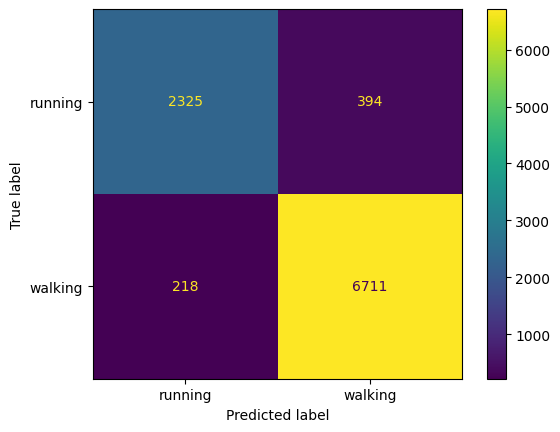

In [87]:
# code from https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test.values)
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred), labels=le.inverse_transform(clf.classes_))
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(clf.classes_))
disp.plot()
plt.show()

# Saving the trained model

In [88]:
# import joblib
# from pathlib import Path
# joblib.dump(clf, str(Path('models')/'action'/'pose_action_classifier_jogging=running.pkl'))
# joblib.dump(le, str(Path('models')/'label'/'label_encoder.pkl'))

# loading the saved model
```python
# Load the model from the file
pose_action_classifier = joblib.load('filename.pkl')
label_encoder = joblib.load('filename2.pkl')

# Use the loaded model to make predictions
y_pred = pose_action_classifier.predict(X_test)
action_pred = label_encoder.inverse_transform(y_pred)

```